In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style("ticks")
sns.set_palette(sns.dark_palette("black"))

In [4]:
# color_Obs = sns.xkcd_rgb['grey']
# color_CF = sns.xkcd_rgb['denim blue']
# color_EN = sns.xkcd_rgb['medium green']
color_Obs = sns.xkcd_rgb['grey']
color_CF = sns.xkcd_rgb['black']
color_EN = sns.xkcd_rgb['black']

In [5]:
#yoshino = create_cherry_dc_yoshino()
#kwanzan = create_cherry_dc_kwanzan()
#yoshino.show_prediction(yoshino.export_years, julian=True, name='yoshino')
#kwanzan.show_prediction(kwanzan.export_years, julian=True, name='kwanzan')

In [6]:
yoshino = pd.read_csv('./yoshino.csv')
kwanzan = pd.read_csv('./kwanzan.csv')

In [7]:
def melt(df, cultivar=None, from_year=None, to_year=None):
    if from_year is not None:
        df = df[df.year >= from_year]
    if to_year is not None:
        df = df[df.year <= to_year]
    df = df[['year', 'Obs', 'CF', 'EN']]
    df = pd.melt(df, id_vars=['year'], var_name='Model', value_name='jday')
    df['subject'] = 0
    if cultivar is not None:
        df['Cultivar'] = cultivar
    return df

In [8]:
melt(yoshino).head()

,year,Model,jday,subject
0,1937,Obs,104.5,0
1,1938,Obs,84.5,0
2,1939,Obs,89.5,0
3,1940,Obs,104.5,0
4,1941,Obs,102.5,0


In [9]:
def plot(name, ylim=None, from_year=None, to_year=None):
    df = pd.read_csv('{}.csv'.format(name))
    df = melt(df, from_year=from_year, to_year=to_year)
    plt.figure(figsize=(12, 4))
    #ax = sns.tsplot(time='year', value='jday', condition='Model', unit='subject', data=df)
    ax = sns.tsplot(data=df[df.Model == 'Obs'], color=color_Obs, time='year', value='jday', condition='Model', unit='subject', err_style=None, interpolate=False)
    ax = sns.tsplot(data=df[df.Model == 'CF'], color=color_CF, ls=':', time='year', value='jday', condition='Model', unit='subject', err_style=None, ax=ax)
    ax = sns.tsplot(data=df[df.Model == 'EN'], color=color_EN, ls='-', time='year', value='jday', condition='Model', unit='subject', err_style=None, ax=ax)
    ax.set(xlabel='Year', ylabel='Flowering date')
    if ylim is not None:
        ax.set(ylim=ylim)
    plt.legend(loc=4)
    plt.savefig('prediction_{}.png'.format(name), dpi=300)

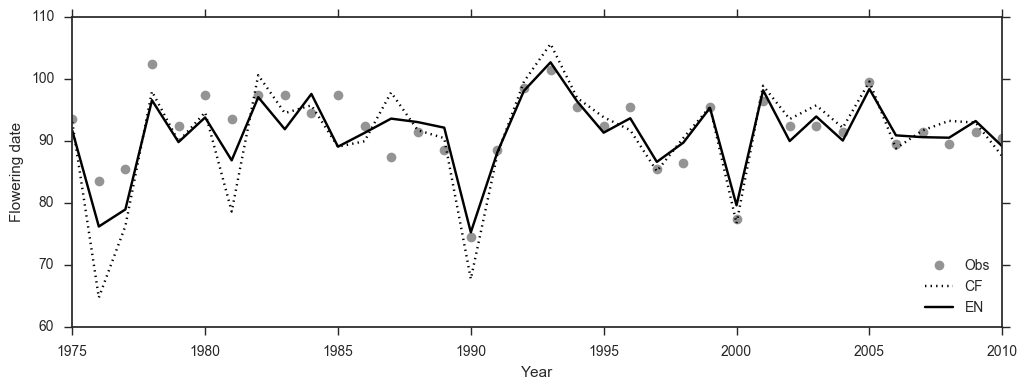

In [10]:
plot('yoshino', ylim=(60, 110), from_year=1975, to_year=2010)

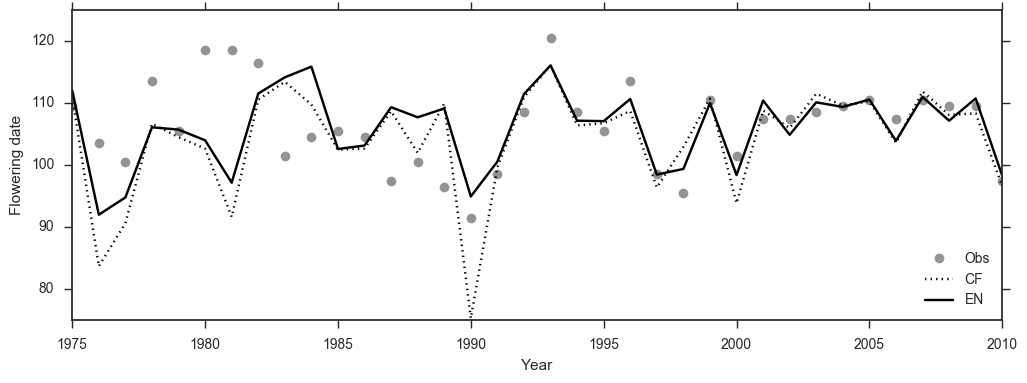

In [11]:
plot('kwanzan', ylim=(75, 125), from_year=1975, to_year=2010)

In [12]:
df = pd.concat([melt(yoshino, 'Yoshino', 1975, 2010), melt(kwanzan, 'Kwanzan', 1975, 2010)])

In [13]:
df.head()

,year,Model,jday,subject,Cultivar
0,1975,Obs,93.5,0,Yoshino
1,1976,Obs,83.5,0,Yoshino
2,1977,Obs,85.5,0,Yoshino
3,1978,Obs,102.5,0,Yoshino
4,1979,Obs,92.5,0,Yoshino


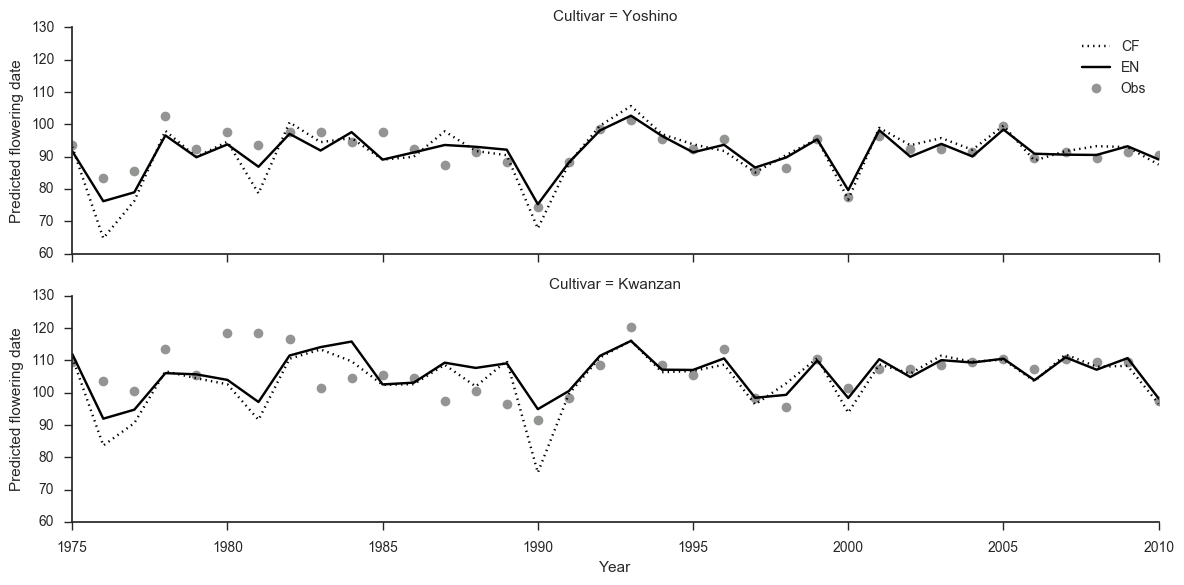

In [14]:
def plot2(x, y, **kwargs):
    ax = plt.gca()
    df = kwargs.pop('data')
    ax = sns.tsplot(data=df[df.Model == 'Obs'], color=color_Obs, time='year', value='jday', condition='Model', unit='subject', err_style=None, interpolate=False, ax=ax)
    ax = sns.tsplot(data=df[df.Model == 'CF'], color=color_CF, ls=':', time='year', value='jday', condition='Model', unit='subject', err_style=None, ax=ax)
    ax = sns.tsplot(data=df[df.Model == 'EN'], color=color_EN, ls='-', time='year', value='jday', condition='Model', unit='subject', err_style=None, ax=ax)
    ax.set(xlabel='Year', ylabel='Flowering date')
plt.figure(figsize=(12, 4))
g = sns.FacetGrid(df, row='Cultivar', legend_out=False, size=3, aspect=4)
g.map_dataframe(plot2, 'year', 'jday')
g.set_axis_labels('Year', 'Predicted flowering date')
g.add_legend()
plt.savefig('predictions.png', dpi=300)

In [15]:
vdf = df[(df.Cultivar == 'Yoshino') & df.year.isin(range(1975, 1991))].set_index(['year'])
print(((vdf[vdf.Model == 'Obs'].jday - vdf[vdf.Model == 'EN'].jday)**2).mean()**0.5)
print(((vdf[vdf.Model == 'Obs'].jday - vdf[vdf.Model == 'CF'].jday)**2).mean()**0.5)

4.78285822626
7.69273478048


In [16]:
vdf = df[(df.Cultivar == 'Yoshino') & df.year.isin(range(1991, 2011))].set_index(['year'])
print(((vdf[vdf.Model == 'Obs'].jday - vdf[vdf.Model == 'EN'].jday)**2).mean()**0.5)
print(((vdf[vdf.Model == 'Obs'].jday - vdf[vdf.Model == 'CF'].jday)**2).mean()**0.5)

1.52674132141
2.20262627334


In [17]:
vdf = df[(df.Cultivar == 'Kwanzan') & df.year.isin(range(1975, 1991))].set_index(['year'])
print(((vdf[vdf.Model == 'Obs'].jday - vdf[vdf.Model == 'EN'].jday)**2).mean()**0.5)
print(((vdf[vdf.Model == 'Obs'].jday - vdf[vdf.Model == 'CF'].jday)**2).mean()**0.5)

9.93634206872
11.9956363232


In [18]:
vdf = df[(df.Cultivar == 'Kwanzan') & df.year.isin(range(1991, 2011))].set_index(['year'])
print(((vdf[vdf.Model == 'Obs'].jday - vdf[vdf.Model == 'EN'].jday)**2).mean()**0.5)
print(((vdf[vdf.Model == 'Obs'].jday - vdf[vdf.Model == 'CF'].jday)**2).mean()**0.5)

2.33095652755
3.22616796249


In [19]:
#fuji = create_apple_kearneysville().suites[6]
#peach_wonju = create_peach_korea().suites[7]
#fuji.show_prediction(fuji.export_years, julian=True, name='fuji')
#peach_wonju.show_prediction(wonju.export_years, julian=True, name='peach_wonju')

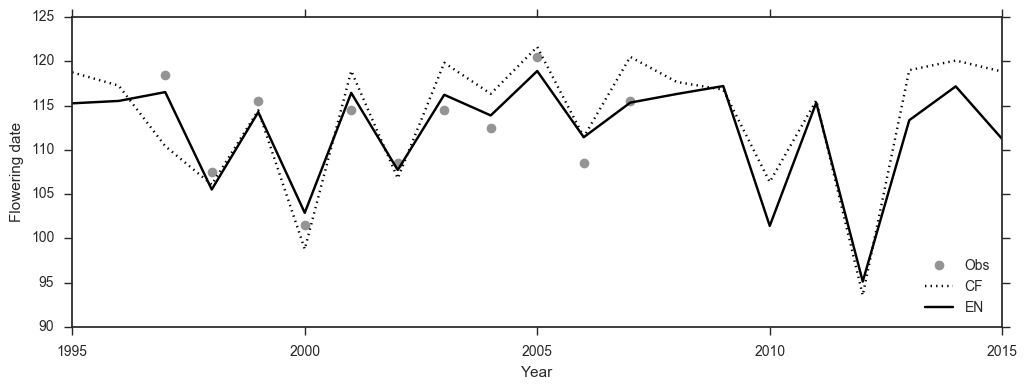

In [20]:
plot('fuji', from_year=1995, to_year=2015)

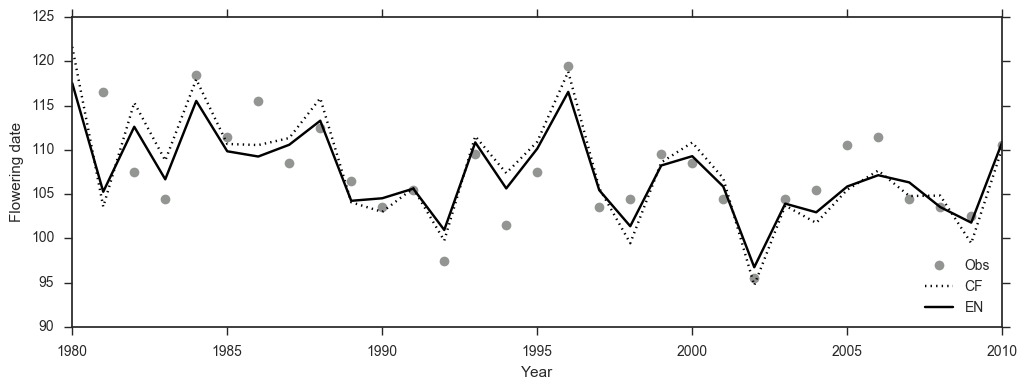

In [21]:
plot('peach_wonju', from_year=1980, to_year=2010)